In [3]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import kv
import spinmob 
%matplotlib inline
import cmath as c
from sympy import symbols
#ianski is the best

In [13]:
#spin orbit coupling
def Hsoc (lamda,x,y):
    return 4*lamda*(2*m.sin(m.sqrt(3)*y/2)*m.cos(3*x/2)-m.sin(m.sqrt(3)*y))
def Hsocm (lamda,x,y):
    return -4*lamda*(2*m.sin(m.sqrt(3)*y/2)*m.cos(3*x/2)-m.sin(m.sqrt(3)*y))

#chemical potential 
def Hpot (lamda):
    return lamda
def Hpotm(lamda):
    return -lamda

#tight binding
def Htb (t,x,y):
    theta1 = complex(0,x/2)
    theta2 = complex(0,-x)
    return t*(2*c.exp(theta1)*m.cos(m.sqrt(3)*y/2)+c.exp(theta2))
def Htbh (t,x,y) :
    return Htb(t,x,y).conjugate()

#Rashba term (tight binding and spin)
def Hr_ud (lamda,x,y):
    
    theta1 = complex(0,x/2 + m.sqrt(3)*y/2)
    theta2 = complex(0,x/2 - m.sqrt(3)*y/2)
    theta3 = complex(0,-x)
    
    coef1 = complex(m.sqrt(3)/2,1/2)
    coef2 = complex(-m.sqrt(3)/2,1/2)
    coef3 = complex(0,1)
    
    return complex(0,1)*lamda*(coef1*c.exp(theta1) + coef2*c.exp(theta2) + coef3*c.exp(theta3))

def Hrh_ud (lamda,x,y):
    return Hr_ud(lamda,x,y).conjugate()
    
def Hr_du (lamda,x,y):
    
    theta1 = complex(0,x/2 + m.sqrt(3)*y/2)
    theta2 = complex(0,x/2 - m.sqrt(3)*y/2)
    theta3 = complex(0,-x)
    
    coef1 = complex(m.sqrt(3)/2, -1/2)
    coef2 = complex(-m.sqrt(3)/2, -1/2)
    coef3 = complex(0,-1)
    
    return complex(0,1)*lamda*(coef1*c.exp(theta1) + coef2*c.exp(theta2) + coef3*c.exp(theta3))

def Hrh_du (lamda,x,y):
    return Hr_du(lamda,x,y).conjugate()
    


In [14]:
points = 5
pot, soc, tb, r = 0, 1, 1, 2

Ham = np.zeros((4,4))
Energy = np.zeros((points*points,4))
x = -m.pi
y = -m.pi
increment = 2*m.pi/points
for i in range(points**2):
    Ham = np.array([[Hsoc(soc,x,y)+Hpot(pot), Htb(tb,x,y), 0, Hr_ud(r,x,y)], 
                    [Htbh(tb,x,y), Hsocm(soc,x,y)-Hpot(pot), Hrh_ud(r,x,y), 0],
                    [0, Hr_du(r,x,y), Hsoc(soc,x,y)+Hpot(pot), Htb(tb,x,y)], 
                    [Hrh_du(r,x,y), 0, Htbh(tb,x,y), Hsocm(soc,x,y)-Hpot(pot)]],     dtype = complex)
    
    Energy[i] = np.linalg.eig(Ham)[0]
    x += increment
    if x == m.pi:
        x = -m.pi/2
        y += increment
          
Energy1 = np.reshape(Energy,len(Energy)*len(Energy[0]))

        

[-9.158787481129748, -9.158787481129734, -8.654607314554287, -8.65460731455428, -8.307896487747113, -8.307896487747108, -8.192274074571934, -8.192274074571921, -8.192274074571916, -8.192274074571904, -7.600428062782864, -7.6004280627828615, -7.256329560197544, -7.256329560197529, -7.256329560197528, -7.256329560197516, -6.876511062704955, -6.876511062704944, -6.876511062704931, -6.876511062704919, -5.994018633953138, -5.994018633953134, -5.994018633953132, -5.994018633953131, -5.2414251428391685, -5.241425142839164, -5.241425142839144, -5.241425142839139, -5.046275767146978, -5.046275767146978, -5.046275767146965, -5.046275767146965, -4.532765406762058, -4.532765406762054, -4.53276540676204, -4.532765406762034, -3.91383061149788, -3.91383061149788, -3.913830611497877, -3.9138306114978754, -3.6415432806927104, -3.6415432806927104, -3.6415432806927064, -3.6415432806927046, -3.2693664810012493, -3.269366481001246, -2.8004142330606574, -2.8004142330606574, -2.800414233060656, -2.8004142330

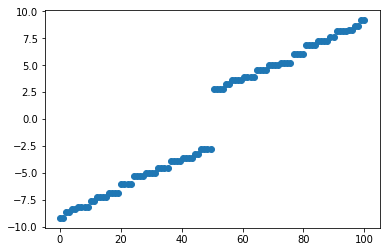

In [15]:
Energy1 = sorted(Energy1)
print(Energy1)
X = np.linspace(0,len(Energy1),len(Energy1))
plt.scatter(X,Energy1)

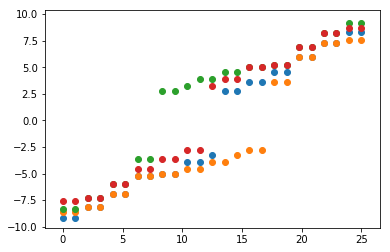

In [16]:
Energy = np.transpose(Energy)
for i in range(len(Energy)):
    Energy[i] = sorted(Energy[i])
X = np.linspace(0,len(Energy[0]),len(Energy[0]))
plt.scatter(X,Energy[0])
plt.scatter(X,Energy[1])
plt.scatter(X,Energy[2])
plt.scatter(X,Energy[3])


# Using Sympy

In [17]:
#Using sympy:
from sympy import *
from sympy import I

#spin orbit coupling
def Hsoc (lamda,x,y):
    return 4*lamda*(2*sin(sqrt(3)*y/2)*cos(3*x/2)-sin(sqrt(3)*y))
def Hsocm (lamda,x,y):
    return -4*lamda*(2*sin(sqrt(3)*y/2)*cos(3*x/2)-sin(sqrt(3)*y))

#chemical potential 
def Hpot (lamda):
    return lamda
def Hpotm(lamda):
    return -lamda

#tight binding
def Htb (t,x,y):
    theta1 = I*x/2
    theta2 = -I*x
    return t*(2*exp(theta1)*cos(sqrt(3)*y/2)+exp(theta2))
def Htbh (t,x,y) :
    return conjugate(Htb(t,x,y))

#Rashba term (tight binding and spin)
def Hr_ud (lamda,x,y):
    
    theta1 = I*(x/2 + sqrt(3)*y/2)
    theta2 = I*(x/2 - sqrt(3)*y/2)
    theta3 = -I*x
    
    coef1 = sqrt(3)/2 + I/2
    coef2 = -sqrt(3)/2 + I/2
    coef3 = I
    
    return I*lamda*(coef1*exp(theta1) + coef2*exp(theta2) + coef3*exp(theta3))

def Hrh_ud (lamda,x,y):
    return conjugate(Hr_ud(lamda,x,y))

def Hr_du (lamda,x,y):
    
    theta1 = I*(x/2 + sqrt(3)*y/2)
    theta2 = I*(x/2 - sqrt(3)*y/2)
    theta3 = -I*x
    
    coef1 = sqrt(3)/2 -I/2
    coef2 = -sqrt(3)/2 -I/2
    coef3 = -I
    
    return I*lamda*(coef1*exp(theta1) + coef2*exp(theta2) + coef3*exp(theta3))

def Hrh_du (lamda,x,y):
    return conjugate(Hr_du(lamda,x,y))


In [ ]:

x,y,z = symbols('x,y,z')
pot, soc, tb, r = 0, 1, 1, 2

Ham = Matrix(4,4,[Hsoc(soc,x,y)+Hpot(pot), Htb(tb,x,y), 0, Hr_ud(r,x,y), 
                    Htbh(tb,x,y), Hsocm(soc,x,y)-Hpot(pot), Hrh_ud(r,x,y), 0,
                    0, Hr_du(r,x,y), Hsoc(soc,x,y)+Hpot(pot), Htb(tb,x,y), 
                    Hrh_du(r,x,y), 0, Htbh(tb,x,y), Hsocm(soc,x,y)-Hpot(pot)])

(P,D) = Ham.diagonalize()


In [ ]:
x,y = symbols('x,y')

H1 = lambdify( [x,y], D[0] )
H2 = lambdify( [x,y], D[5] )
H3 = lambdify( [x,y], D[10] )
H4 = lambdify( [x,y], D[15] )

D[0] == D[5]

In [ ]:
x = 3
y = -3
I = complex(0,1)
def conjugate(a):
    return a.conjugate()
def sqrt(a):
    return np.sqrt(a)
def exp(a):
    return np.exp(a)
def cos(a):
    return np.cos(a)
def sin(a):
    return np.sin(a)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#plotting total wavefunction

fig = plt.figure()
ax = fig.gca(projection='3d')
x_range = m.pi+0.2
y_range = m.pi+0.2
# Make data.
X = np.arange(-x_range, x_range, 0.1)
Y = np.arange(-y_range, y_range, 0.1)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)


# Plot the surface.
surf1 = ax.plot_surface(X, Y, H1(X,Y).real, cmap=cm.Blues,
                       linewidth=0, antialiased=False)

#surf2 = ax.plot_surface(X, Y, H2(X,Y).real, cmap=cm.Reds,
#                       linewidth=0, antialiased=False)

#surf3 = ax.plot_surface(X, Y, H3(X,Y).real, cmap=cm.Greys,
 #                      linewidth=0, antialiased=False)

surf4 = ax.plot_surface(X, Y, H4(X,Y).real, cmap=cm.Greens,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-5, 5)
ax.set_xlim(-x_range+0.2,x_range+0.2)
ax.set_ylim(-y_range+0.2,y_range+0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf1, shrink=0.5, aspect=5)
#fig.colorbar(surf2, shrink=0.5, aspect=5)
#fig.colorbar(surf3, shrink=0.5, aspect=5)
#fig.colorbar(surf4, shrink=0.5, aspect=5)

#plt.show()
# rotate the axes and update
ax.view_init(45, 45)
plt.draw()

In [112]:
print(Hr(1,x,y))
print(Hrh(1,x,y))


I*(2*exp(I*x/2)*cos(sqrt(3)*y/2) + exp(-I*x))
-I*(exp(I*conjugate(x)) + 2*exp(-I*conjugate(x)/2)*cos(sqrt(3)*conjugate(y)/2))
